# Capstone Project

### Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or previntive measures to stop or control the attrition.

### Importing Libraries

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

### Importing Data

In [ ]:
hr = pd.read_csv('HR_Employee_Attrition_Data.csv')

### Basic EDA

In [ ]:
# To display top 5 data's
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# To display bottom 5 data's
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
2939,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2940,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
# Shape of the Dataset
hr.shape

(2940, 35)

In [ ]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Differentiaiting Numerical and Categorical Variables for better understanding

In [ ]:
numerical = ['Age', 'DailyRate','DistanceFromHome', 'Education','EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
                     'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                     'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction',
                     'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

categorical = [ 'Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime']
hr = hr[numerical + categorical]
hr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,1,3,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,33,1392,3,4,1,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,27,591,2,1,1,5,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,884,23,2,1,2936,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,39,613,6,1,1,2937,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,27,155,4,3,1,2938,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,49,1023,2,3,1,2939,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
# Name of the columns in HR Deparment Data
hr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Getting Info of Data types and Null Value Check

In [ ]:
# Information of the Datatype of Columns along with non null values 
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   DailyRate                 2940 non-null   int64 
 2   DistanceFromHome          2940 non-null   int64 
 3   Education                 2940 non-null   int64 
 4   EmployeeCount             2940 non-null   int64 
 5   EmployeeNumber            2940 non-null   int64 
 6   EnvironmentSatisfaction   2940 non-null   int64 
 7   HourlyRate                2940 non-null   int64 
 8   JobInvolvement            2940 non-null   int64 
 9   JobLevel                  2940 non-null   int64 
 10  JobSatisfaction           2940 non-null   int64 
 11  MonthlyIncome             2940 non-null   int64 
 12  MonthlyRate               2940 non-null   int64 
 13  NumCompaniesWorked        2940 non-null   int64 
 14  PercentSalaryHike       

In [ ]:
# Checking exclusively the datatypes of columns
hr.dtypes

Age                          int64
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
BusinessTravel              object
Department          

In [ ]:
# Gives the count of Non null values of all the columns
hr.isnull().count()
# Output further gives an insight that there are no 'null values' in the column.

Age                         2940
DailyRate                   2940
DistanceFromHome            2940
Education                   2940
EmployeeCount               2940
EmployeeNumber              2940
EnvironmentSatisfaction     2940
HourlyRate                  2940
JobInvolvement              2940
JobLevel                    2940
JobSatisfaction             2940
MonthlyIncome               2940
MonthlyRate                 2940
NumCompaniesWorked          2940
PercentSalaryHike           2940
PerformanceRating           2940
RelationshipSatisfaction    2940
StandardHours               2940
StockOptionLevel            2940
TotalWorkingYears           2940
TrainingTimesLastYear       2940
WorkLifeBalance             2940
YearsAtCompany              2940
YearsInCurrentRole          2940
YearsSinceLastPromotion     2940
YearsWithCurrManager        2940
Attrition                   2940
BusinessTravel              2940
Department                  2940
EducationField              2940
Gender    

In [ ]:
# Trying to find out the presence of null values
hr.isnull().sum()
# we can see that there are no null values present in the data.

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
Over18    

### Checking of Duplicate Values

In [ ]:
# Checking Duplicate Rows
duplicate_hr_rows =  hr[hr.duplicated()]
duplicate_hr_rows.shape
# From the output we can see there are no duplicate rows So, our data set need not to be modified.

(0, 35)

In [ ]:
# Plotting the Infamous Five Point Summary
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
hr.columns


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Univariate Analysis

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


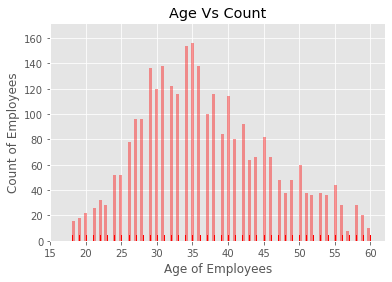

In [ ]:
# Plot of employee count
a = sns.distplot(hr['Age'], kde = False, bins = 100, color = 'Red', rug =True)
a.set_xlabel('Age of Employees')
a.set_ylabel('Count of Employees')
a.set_title('Age Vs Count')
a.set_xticks(range(15,61,5))
# A large concentration of employees are in the range of of 25 years to 40 years

<AxesSubplot:xlabel='Attrition', ylabel='count'>

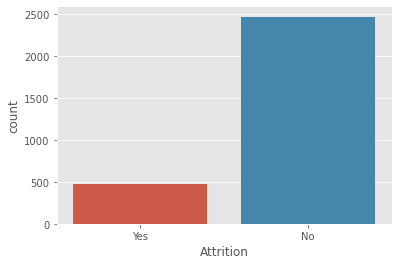

In [ ]:
# Plot of Attrition
sns.countplot(x = 'Attrition', data = hr)
# Most of the employees are not going for attrition , but still around 20% are opting for it.

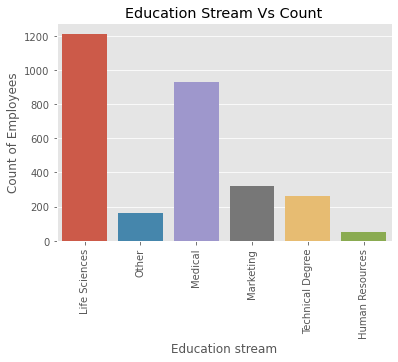

In [ ]:
# Different domains in which employess are distributed
a = sns.countplot(x = 'EducationField', data = hr)
a.set_xlabel('Education stream')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_ylabel('Count of Employees')
a.set_title('Education Stream Vs Count')
plt.show()
# It helps us to understand the statistics of the employees of various fields

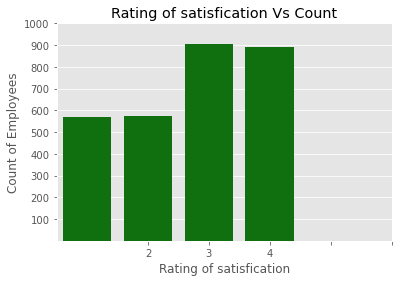

In [ ]:
# Determining the Environmental satisfication of employees
a = sns.countplot(x = 'EnvironmentSatisfaction', data = hr, color = 'Green')
a.set_xlabel('Rating of satisfication')
a.set_ylabel('Count of Employees')
a.set_title('Rating of satisfication Vs Count')
a.set_xticks(range(1,6,1))
a.set_yticks(range(100,1100,100))
# Poor satisfication of employees can be seen. Around 1000 to 1200 employees are voting for 1 and 2 levels of satisfication which may trigger attrition

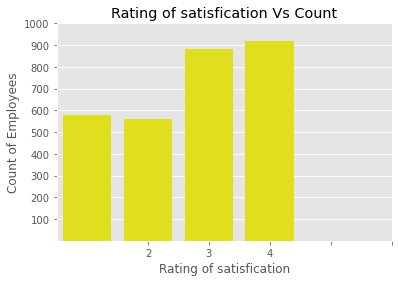

In [ ]:
# Determinig the job satisfication of employees
a = sns.countplot(x = 'JobSatisfaction', data = hr, color = 'Yellow')
a.set_xlabel('Rating of satisfication')
a.set_ylabel('Count of Employees')
a.set_title('Rating of satisfication Vs Count')
a.set_xticks(range(1,6,1))
a.set_yticks(range(100,1100,100))
# Poor job stisfication can be seen for around 1000-1200 employees which may trigger attrition

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


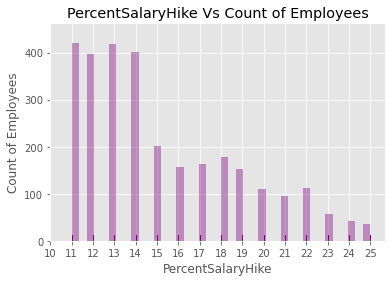

In [ ]:
# Determining the Percentage salary hike of Employees
a = sns.distplot(hr['PercentSalaryHike'], kde = False, bins = 40, color = 'Purple', rug =True)
a.set_xlabel('PercentSalaryHike')
a.set_ylabel('Count of Employees')
a.set_title('PercentSalaryHike Vs Count of Employees')
a.set_xticks(range(10,26,1))
# Plot shows most of the employees are getting the hike betwwen 11 to 15 which ma be less as compared to industry standards,
# hence may trigger attrition

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


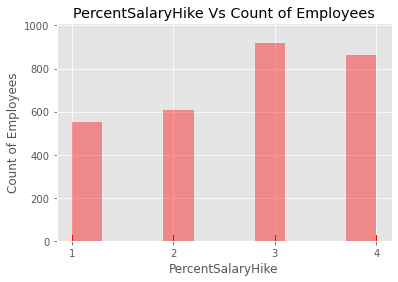

In [ ]:
# To determine the relaionship status with managers
a = sns.distplot(hr['RelationshipSatisfaction'], kde = False, bins = 10, color = 'Red', rug =True)
a.set_xlabel('PercentSalaryHike')
a.set_ylabel('Count of Employees')
a.set_title('PercentSalaryHike Vs Count of Employees')
a.set_xticks(range(1,5,1))
# We can see from the insights that portion of employees have tough times with Managers and the same needs to be reduced by HR to prevent attrition

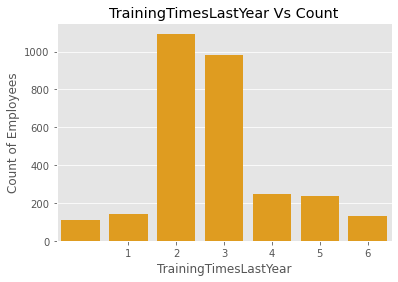

In [ ]:
# To determine the Training times in Last year
a = sns.countplot(x = 'TrainingTimesLastYear', data = hr, color = 'Orange')
a.set_xlabel('TrainingTimesLastYear')
a.set_ylabel('Count of Employees')
a.set_title('TrainingTimesLastYear Vs Count')
a.set_xticks(range(1,7,1))
# It seems the training time for some of the employees is 0 which is not a good sign and needs to be catered to effectively boost their confidence and their
# skills

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


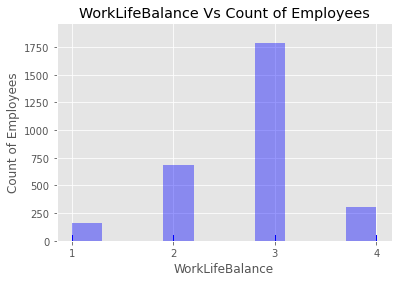

In [ ]:
# To determine the work life balance
a = sns.distplot(hr['WorkLifeBalance'], kde = False, bins = 10, color = 'Blue', rug =True)
a.set_xlabel('WorkLifeBalance')
a.set_ylabel('Count of Employees')
a.set_title('WorkLifeBalance Vs Count of Employees')
a.set_xticks(range(1,5,1))
# The work life balance of around 900 employees is very poor i.e having an index I and II which will trigger attrition, hence HR should focus on the same.

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


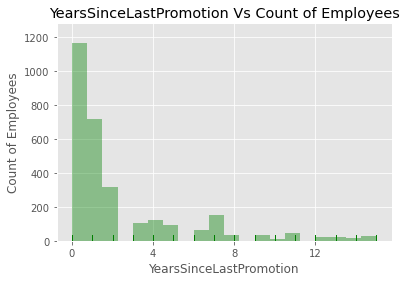

In [ ]:
# To determine residence time of employess in current roles
a = sns.distplot(hr['YearsSinceLastPromotion'], kde = False, bins = 20, color = 'Green', rug =True)
a.set_xlabel('YearsSinceLastPromotion')
a.set_ylabel('Count of Employees')
a.set_title('YearsSinceLastPromotion Vs Count of Employees')
a.set_xticks(range(0,16,4))
# It can be seen from the plot that certain people in 4 to 8 years experience are not promoted, necessary training to be provided to give them leadership roles
# that may further prevent attrition.

In [ ]:
hr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Text(0.5, 1.0, 'OverTime Vs Count')

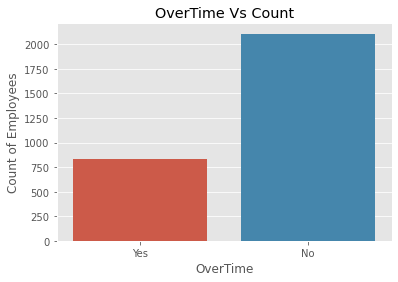

In [ ]:
# to determine the overtime done by employees
a = sns.countplot(x = 'OverTime', data = hr)
a.set_xlabel('OverTime')
a.set_ylabel('Count of Employees')
a.set_title('OverTime Vs Count')
# It is further found that around 800 employees work overtime, necessary compensation for the same should be ensured or new procurement should be
#done else the same will contribute to Attrition

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MonthlyIncome Vs Count')

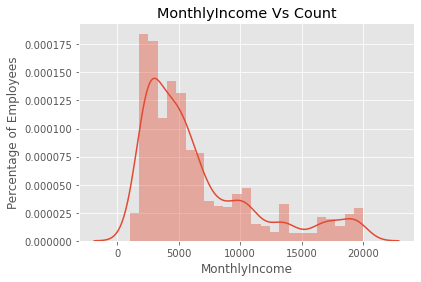

In [ ]:
# To determine the monthly income alongside the percentage of employees
a = sns.distplot(hr['MonthlyIncome'])
a.set_xlabel('MonthlyIncome')
a.set_ylabel('Percentage of Employees')
a.set_title('MonthlyIncome Vs Count')
# It can be seen that higher percentage of count of employees have a monthly income of around Rs. 4000 

In [ ]:
hr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,1,3,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,33,1392,3,4,1,4,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,27,591,2,1,1,5,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,884,23,2,1,2936,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,39,613,6,1,1,2937,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,27,155,4,3,1,2938,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,49,1023,2,3,1,2939,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [ ]:
hr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

<AxesSubplot:ylabel='Attrition'>

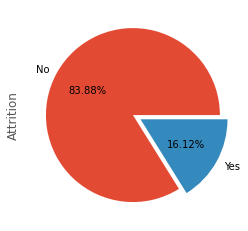

In [ ]:
# The pie plot helps us to understand the percentage of employees opting for attrition (Yes-> indicates attrition)
explode = [0,0.1]
hr['Attrition'].value_counts().plot.pie(autopct = '%1.2f%%', explode = explode)

<AxesSubplot:ylabel='JobSatisfaction'>

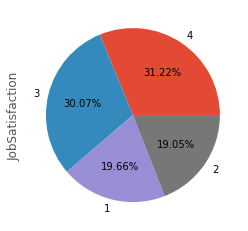

In [ ]:
# The pie plot helps us to understand the various levels of Job satification through out the amployees Level1- Poor job satisfication Around 19.66%
hr['JobSatisfaction'].value_counts().plot.pie(autopct = '%1.2f%%')

<AxesSubplot:ylabel='RelationshipSatisfaction'>

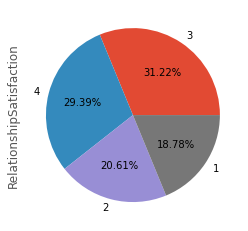

In [ ]:
# The pie plot helps us to understand the Relationship satisfication Level1-> Poorest relationship satisfication
hr['RelationshipSatisfaction'].value_counts().plot.pie(autopct = '%1.2f%%')

<AxesSubplot:ylabel='WorkLifeBalance'>

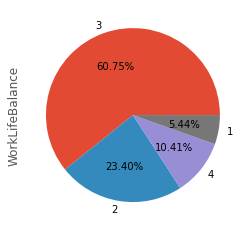

In [ ]:
# The Pie chart of Work life balance indicates Work life balance Level 1 -> 5.44%  Poorest work life balance
hr['WorkLifeBalance'].value_counts().plot.pie(autopct = '%1.2f%%')

<AxesSubplot:ylabel='OverTime'>

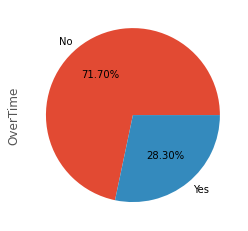

In [ ]:
# The pie plot shows the percentage of employees who opt for Overtime -> Around 28.30% of employees have worked overtime
hr['OverTime'].value_counts().plot.pie(autopct = '%1.2f%%')

# Bi-variate/Multi-variate Analysis

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


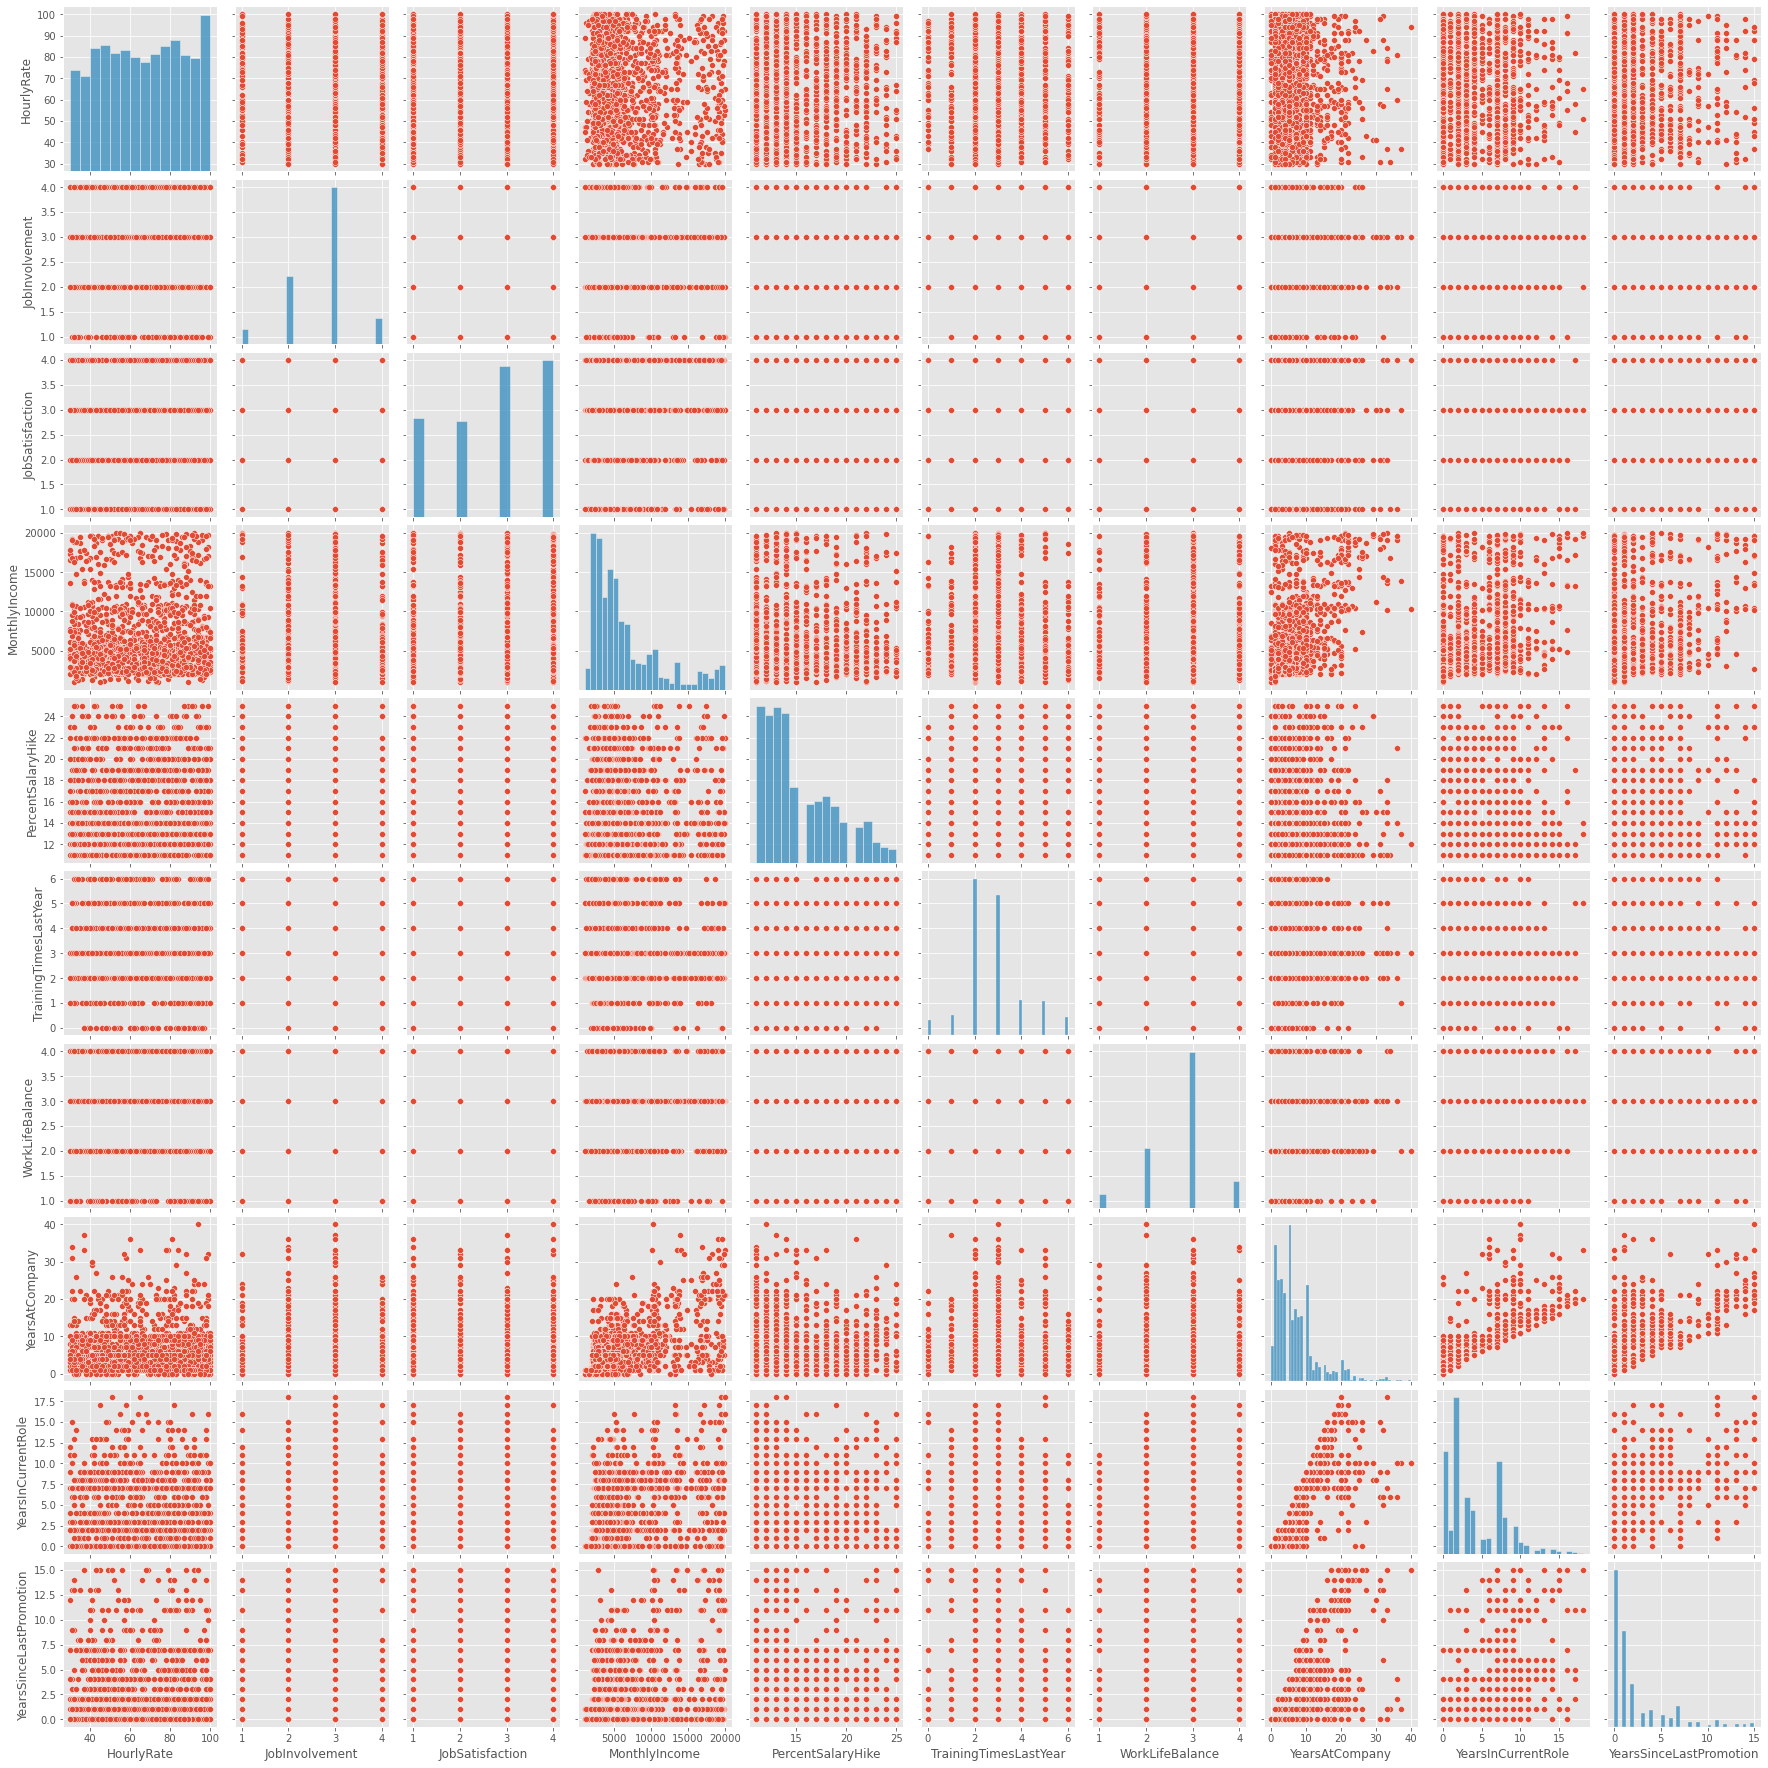

In [ ]:
# Pair plot helps us to understand the relationship of various variables with each other in the HR Attrition Data
cols = ['HourlyRate', 'JobInvolvement',
            'JobSatisfaction', 'MonthlyIncome',
            'PercentSalaryHike',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
            'YearsInCurrentRole', 'YearsSinceLastPromotion']
sns.pairplot(hr[cols], size = 2.5)

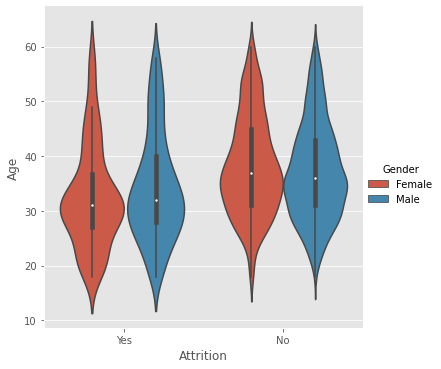

In [ ]:
# To determine the insight of the age group of Male and Female undergoing attrition
sns.catplot(y = 'Age', x = 'Attrition', data = hr, kind = 'violin', hue = 'Gender')
plt.show()
# It gives the insight that Female undergo more attrition quickly at the age of 30's as compared to Male, hence necessary freebies to be generated by HR 
# to keep the movement of woman workforce

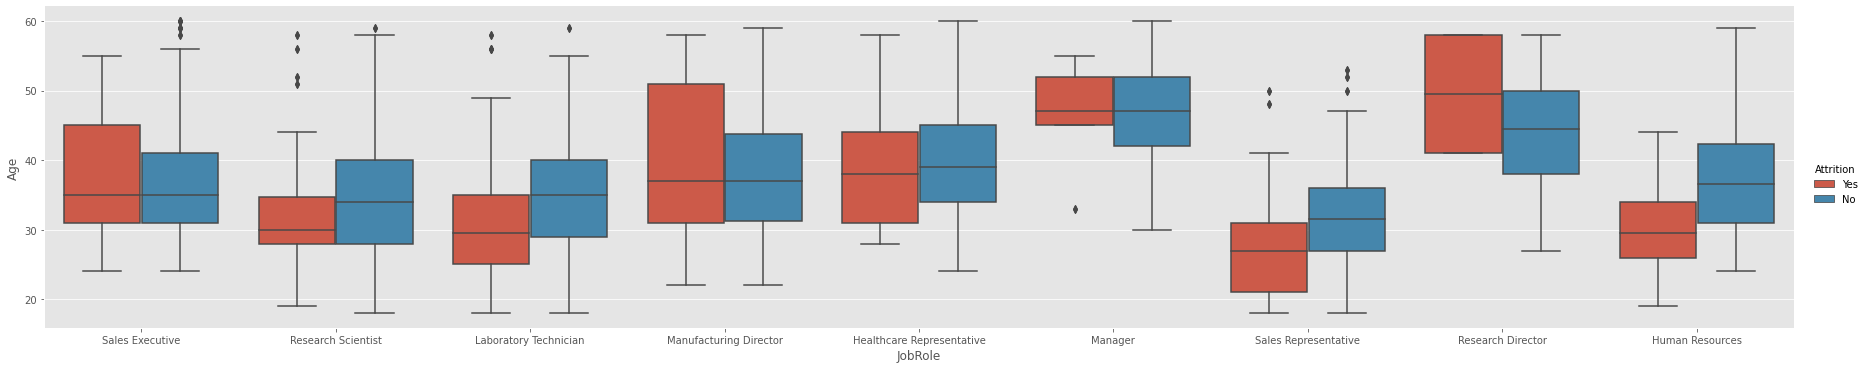

In [ ]:
# To determine the age group of people from different trades undergoing Attrition
sns.catplot(x = 'JobRole', y = 'Age', data = hr, kind = 'box', hue = 'Attrition',aspect = 5)
plt.show()
# It states that the people into post of Reseach Director with age above 40 undergo attrition, people into sales representative at the early career age of 
# 20 to 30 undergo attrition, managers after aaining age of 45, show signs of attrition and similary people in HR department are willing to go for attrition
# at age of 25 to 35, Manufacturing Directors have shown hight tendency to attrition from the age 30 to 60(through out the career), Chances of attrition for
# Resarch scientist  is less as compared to other branches.

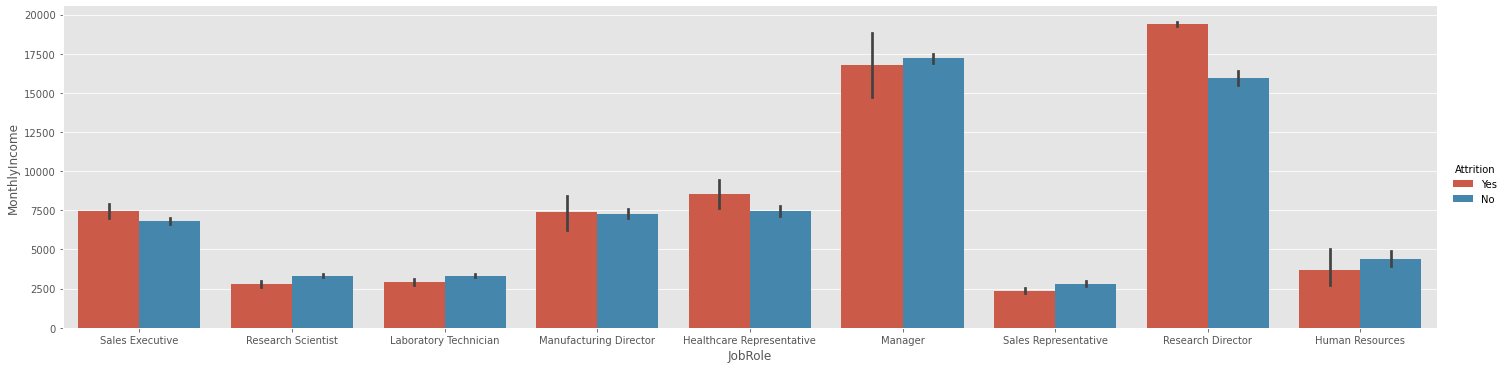

In [ ]:
# To determine the attrition of various workforce along with their monthly income
sns.catplot(x = 'JobRole', y = 'MonthlyIncome', data = hr, kind = 'bar', hue = 'Attrition',aspect = 4)
plt.show()
# The Research directors, manager, Healtcare rep, Manufacturing director are highly paid and their attrition is more as compared to the Reserch scientist,
# Lab Technician, Sales Rep, HR who are less paid and thier attrition is less

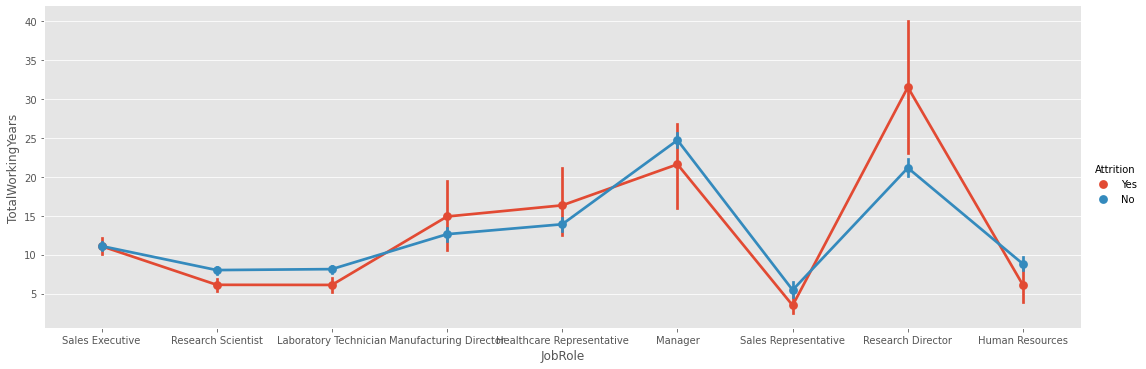

In [ ]:
# To determine the total working hours of various categories of employees and how is it affecting the attritiion
sns.catplot(x = 'JobRole', y = 'TotalWorkingYears', data = hr, kind = 'point', hue = 'Attrition', aspect = 3)
plt.show()
# It can be seen, that the working hours of Reseach Directors is more and their attrition rate too, similarly the working hours is on average basis for
# manufacurinng Direcor and Healthcare Reps as compared to the other divisions but there is high attrition in these divisions.

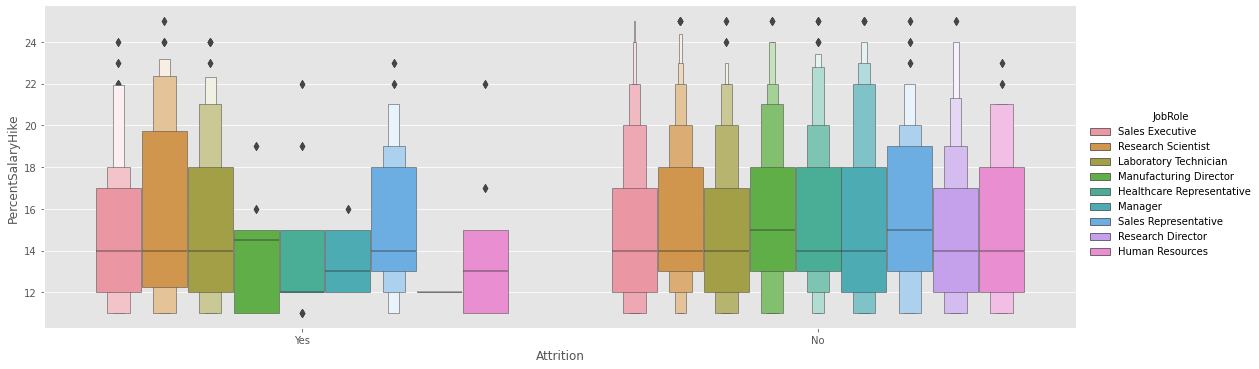

In [ ]:
# To determine the attrition of the employess on the basis of salary hike
sns.catplot(y = 'PercentSalaryHike', x = 'Attrition', data = hr, kind = 'boxen', hue = 'JobRole', aspect = 3)
plt.show()

# It is seen tat research Directors getting a salary hike of average 12 percent are opting for attrition, similarly manufacturing directors , healthcare reps, 
# managers are opting for attrition as if their average percentage of salary hike is less than 15 percent.

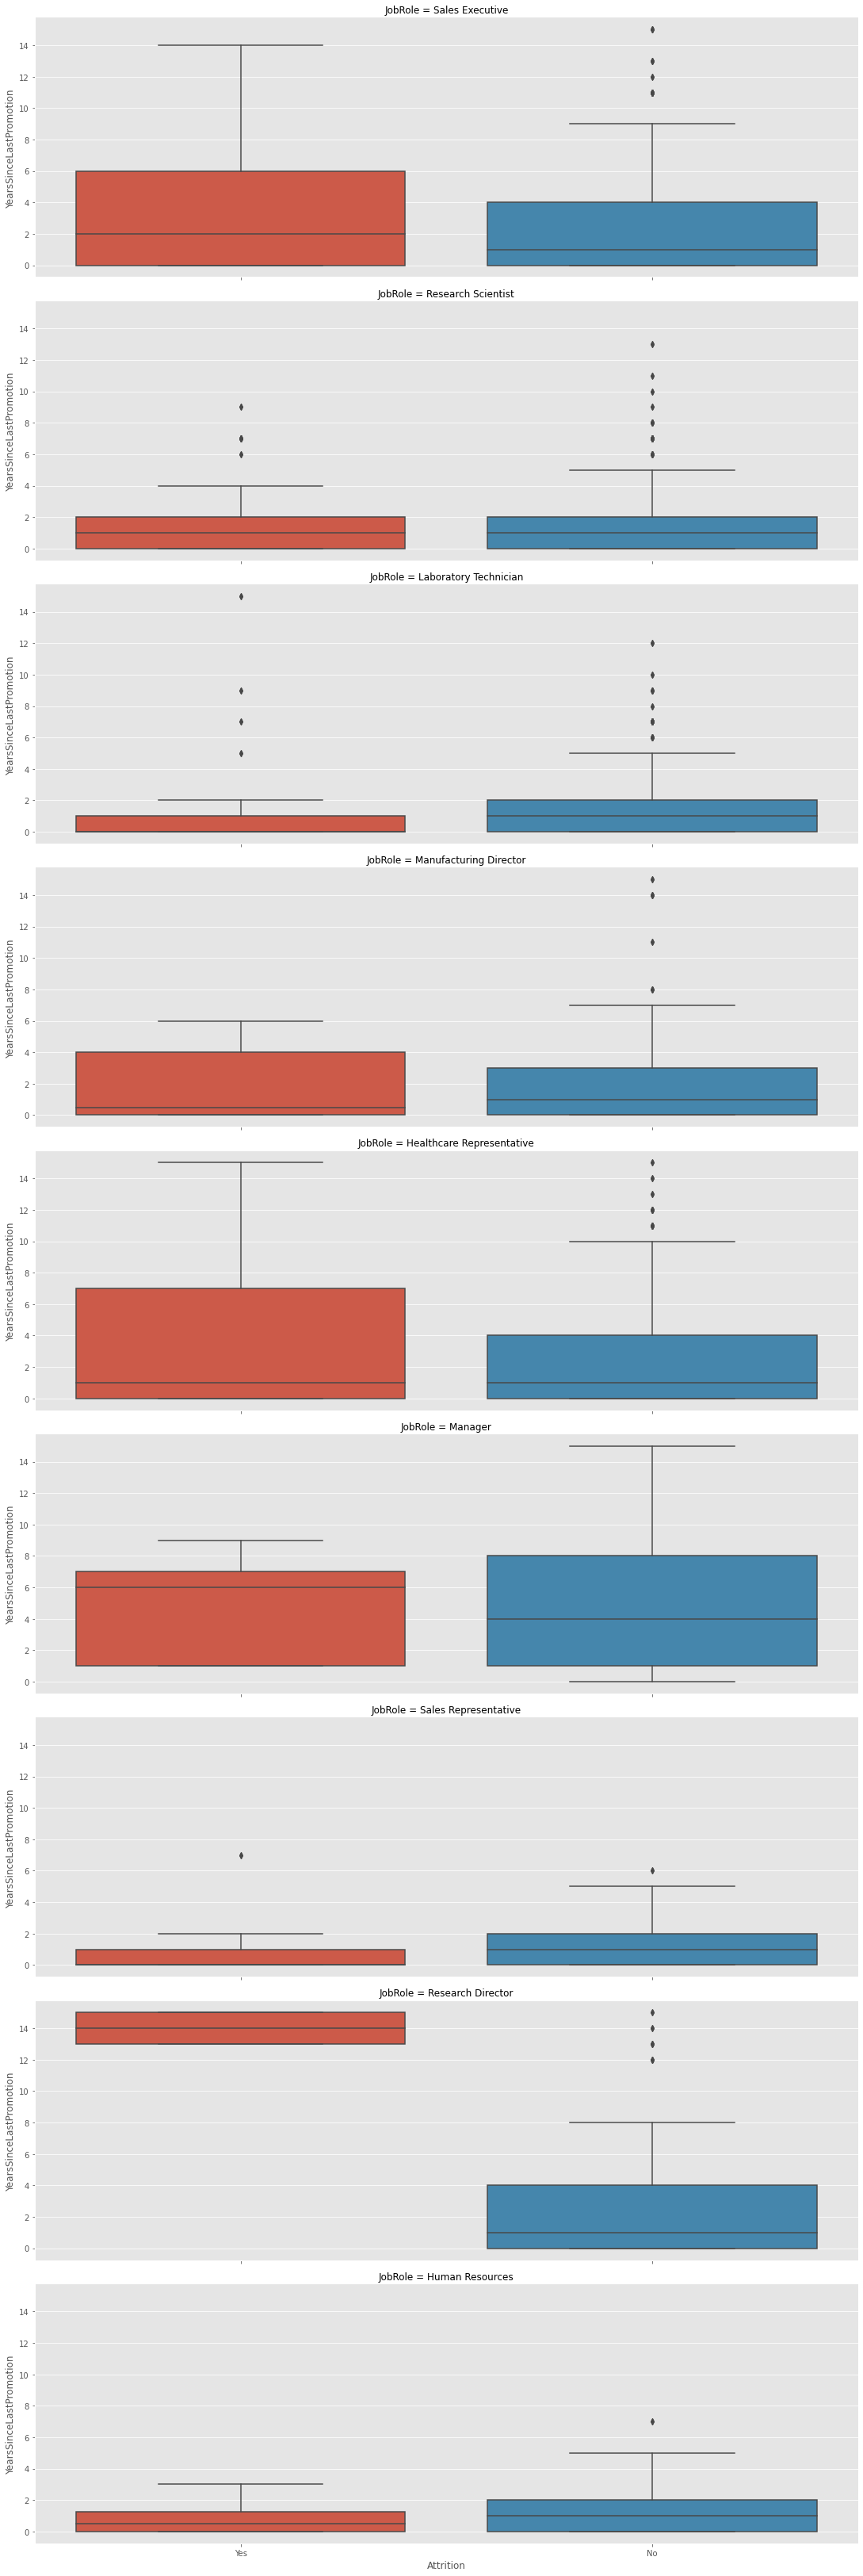

In [ ]:
# To determine the year since last promotion for the varius domains of employess and their respective attrition tendency 
sns.catplot(y = 'YearsSinceLastPromotion', x = 'Attrition', data = hr, kind = 'box',row= 'JobRole',aspect = 3)
plt.show()
# The plot gives the insights that people with less than 2 years od work ex in Research scinetist, lab technician, sales rep  are opting for attrition, whereas
# Research director with greater than 10 years since last promotion are opting for Attrition and people with less than 2 years since last promotion for HR 
# dept. are also opting for attrition.

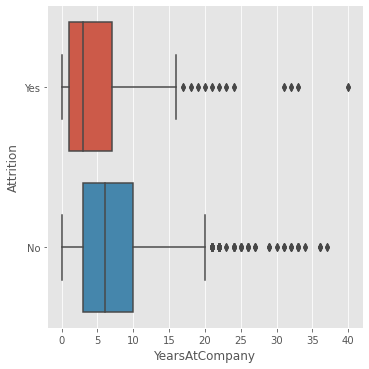

In [ ]:
# To understand the attrition of employees based on the years sustained in this company
sns.catplot(y = 'Attrition', x= 'YearsAtCompany', data = hr,kind = 'box')
# The average age of people who have sustained more years in company have lesser attrition rate than the average age of people who have sustained 
# less years in the company

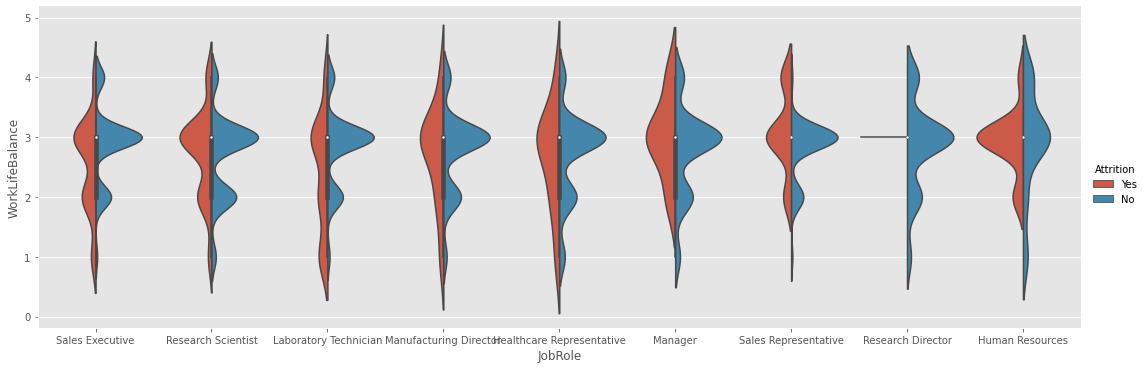

In [ ]:
# To see the work life balance of various employees
sns.catplot(x = 'JobRole', y= 'WorkLifeBalance', data = hr,kind = 'violin', aspect = 3, hue= 'Attrition', split = True)
# We can draw insight that people having the HR domain have good work life balance then the people having other domains, and the Resrach director 
# domain employess have very less attrition rate 

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


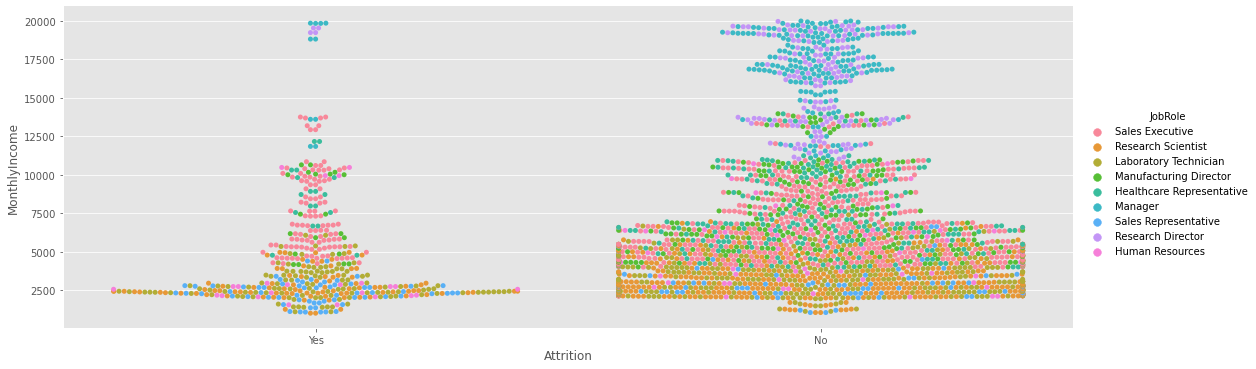

In [ ]:
# To determine the job role and moonthly income of the people and their attrition characterstics.
sns.catplot(x = 'Attrition', y= 'MonthlyIncome', data = hr,kind = 'swarm', hue = 'JobRole',aspect = 3)
# The intent of the graph describes that sales executive  at different lengths of monthly income have shown attrition and similarly Research Directors
# and Managers with high monthly income have shown atttrition

# Data Cleaning


### Checking Variance for numerical columns 

In [ ]:
for i in numerical:
    if hr[i].var() == 0:
        print('The Variance is Zero for the column: ',i)

The Variance is Zero for the column:  EmployeeCount
The Variance is Zero for the column:  StandardHours


In [ ]:
# As the variance is zero for Employee Count and Standard Hours, we can remove the same from the data set as it is not going to contribute in the ML 
# output

hr.drop(columns = ["EmployeeCount","StandardHours"], inplace = True, axis = 1)


In [ ]:
print(hr.shape)
hr.columns
#We can see that 2 columns have been deleted and presently we are left out with only 33 columns

(2940, 33)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

### Trying to find the highly correlated columns

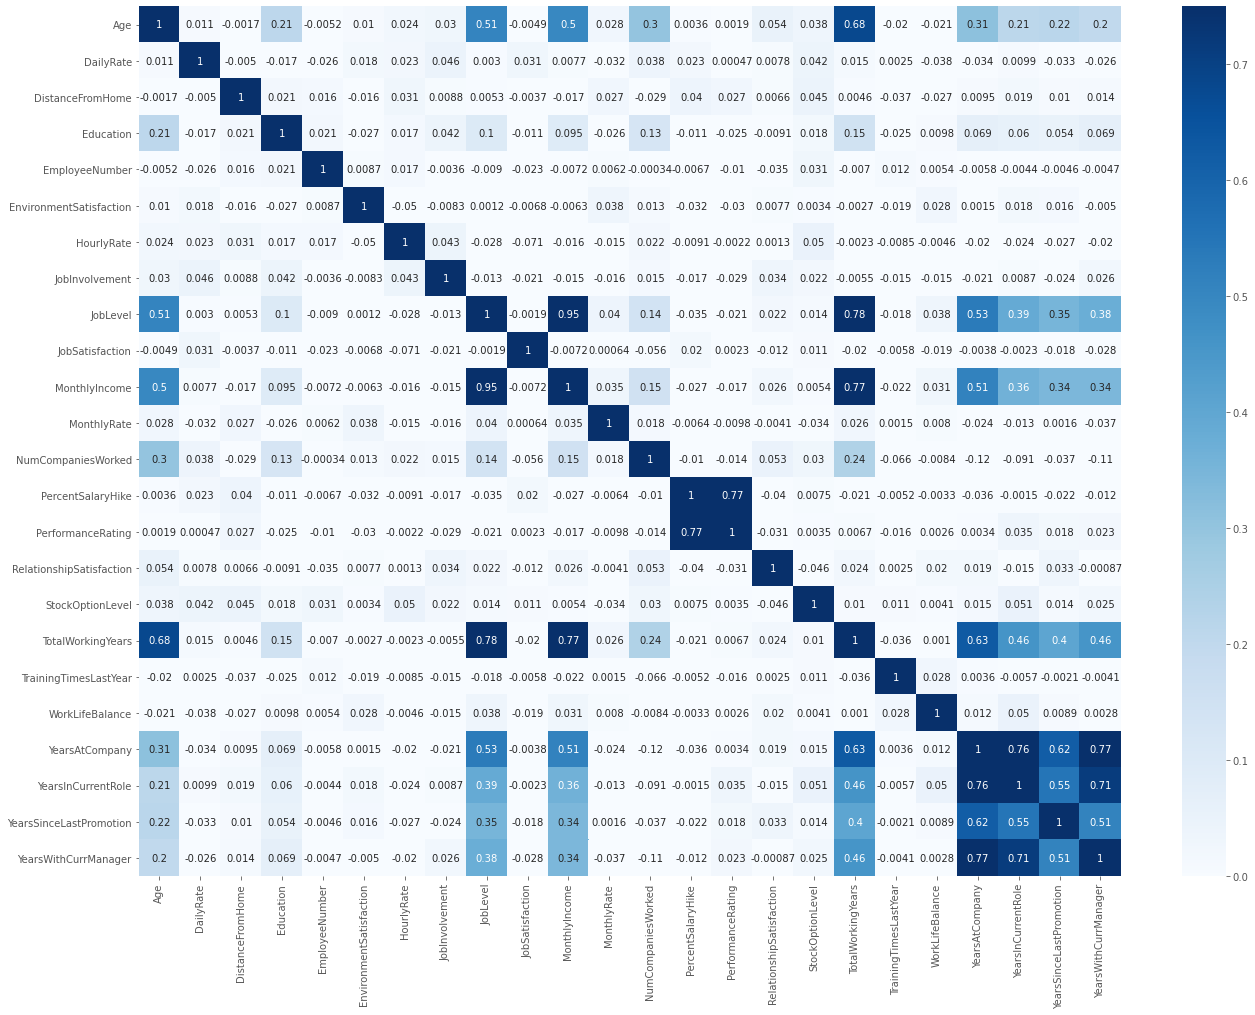

In [ ]:
# Plotting the Correlation matrix between all numerical columns to get the insights of relationship between different columns
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical = ['Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']
hr_num = hr[numerical]
cormat_num = hr_num.corr()
fig, ax = plt.subplots(figsize = (22,16))
sns.heatmap(cormat_num, annot = True, vmax = 0.75, vmin =0, cmap = 'Blues', fmt = '.2g', cbar = True)
plt.show()

In [ ]:
# we can drop certain columns like:  Years with cur manager,  total working years, performance rating, job level

In [ ]:
hr.drop(['JobLevel','TotalWorkingYears','PerformanceRating','YearsWithCurrManager'], axis = 1, inplace = True)

In [ ]:
hr.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion']

hr =hr[numerical+categorical]
hr.shape  #we have again dropped around 4 columns , hence we are left with 29 columns in HR Attrition data

(2940, 29)

In [ ]:
# Trying to analyze whether outliers are lying and whether any treatment is required or not
for i in numerical:
    Median = hr[i].median()
    Mean = hr[i].mean()
    Diff_Med_Mean = Mean - Median
    print('The Diff betweence Mean and Median for: ',i,'is: ',abs(round(Diff_Med_Mean,2)))
# The difference between mean and median is considerable , hence outlier Treatment doesnt make sense

The Diff betweence Mean and Median for:  Age is:  0.92
The Diff betweence Mean and Median for:  DailyRate is:  0.49
The Diff betweence Mean and Median for:  DistanceFromHome is:  2.19
The Diff betweence Mean and Median for:  Education is:  0.09
The Diff betweence Mean and Median for:  EmployeeNumber is:  0.0
The Diff betweence Mean and Median for:  EnvironmentSatisfaction is:  0.28
The Diff betweence Mean and Median for:  HourlyRate is:  0.11
The Diff betweence Mean and Median for:  JobInvolvement is:  0.27
The Diff betweence Mean and Median for:  JobSatisfaction is:  0.27
The Diff betweence Mean and Median for:  MonthlyIncome is:  1583.93
The Diff betweence Mean and Median for:  MonthlyRate is:  77.6
The Diff betweence Mean and Median for:  NumCompaniesWorked is:  0.69
The Diff betweence Mean and Median for:  PercentSalaryHike is:  1.21
The Diff betweence Mean and Median for:  RelationshipSatisfaction is:  0.29
The Diff betweence Mean and Median for:  StockOptionLevel is:  0.21
The Di

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

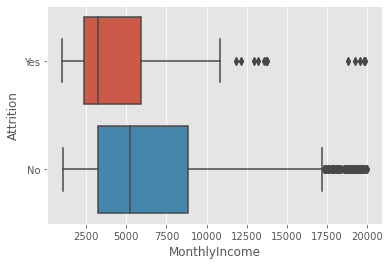

In [ ]:
# To check the outliers for Monthly income column
sns.boxplot(x='MonthlyIncome', y = 'Attrition', data = hr)
# The monthly income for research directors and managers is at a higher end as compared to that of other employess. Moreover it has also been seen in
# previous graphs that the research directors and managers have contributed to high amount of attrition. Hence, removing the same considering the same
# as outliers is insignificant.

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

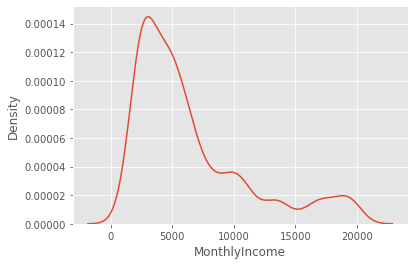

In [ ]:
# The graph is slightly right skewed but the fact is explanibale as above because equal or normalized MonthlyIncome is not expected
sns.distplot(hr['MonthlyIncome'], hist = False)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Attrition'>

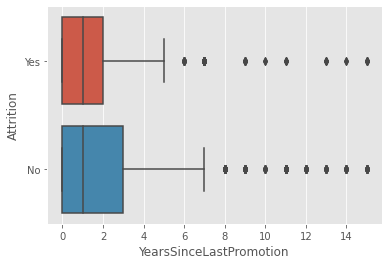

In [ ]:
# To determin any outliers in YearsSinceLastPromotion
sns.boxplot(x='YearsSinceLastPromotion', y = 'Attrition', data = hr)
# We can some no. of ouliers are present but the difference btween mean and median is also very less as compared to the data range

C:\Users\Sandeep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

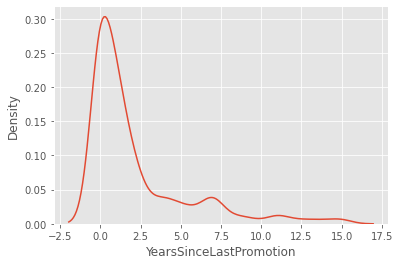

In [ ]:
# the plot shows that it is right skewed and also there is a sharp peak, this column plays an important role and should not be removed or edited as the 
# this data can play a significant role tp determine the attrition as people taking more time for promotion opt for attrition.
sns.distplot(hr['YearsSinceLastPromotion'], hist = False)

In [ ]:
hr.columns.values

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition',
       'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype=object)

In [ ]:
hr.shape

(2940, 29)

In [ ]:
hr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,4,5993,19479,8,11,1,0,0,1,6,4,0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,2,3,61,2,2,5130,24907,1,23,4,1,3,3,10,7,1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,3,4,92,2,3,2090,2396,6,15,2,0,3,3,0,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,33,1392,3,4,4,4,56,3,3,2909,23159,1,11,3,0,3,3,8,7,3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,27,591,2,1,5,1,40,3,2,3468,16632,9,12,4,1,3,3,2,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
hr_model = hr
hr_model

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,4,5993,19479,8,11,1,0,0,1,6,4,0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,2,3,61,2,2,5130,24907,1,23,4,1,3,3,10,7,1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,3,4,92,2,3,2090,2396,6,15,2,0,3,3,0,0,0,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,33,1392,3,4,4,4,56,3,3,2909,23159,1,11,3,0,3,3,8,7,3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,27,591,2,1,5,1,40,3,2,3468,16632,9,12,4,1,3,3,2,2,2,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,884,23,2,2936,3,41,4,4,2571,12290,4,17,3,1,3,3,5,2,0,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
2936,39,613,6,1,2937,4,42,2,1,9991,21457,4,15,1,1,5,3,7,7,1,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
2937,27,155,4,3,2938,2,87,4,2,6142,5174,1,20,2,1,0,3,6,2,0,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
2938,49,1023,2,3,2939,4,63,2,2,5390,13243,2,14,4,0,3,2,9,6,0,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


### Label Encoding and Splitting the data into Train-Test

In [ ]:
def preprocessor(hr_model):
    x = preprocessing.LabelEncoder()
    
    hr_model['Attrition'] = x.fit_transform(hr_model['Attrition'])
    hr_model['BusinessTravel'] = x.fit_transform(hr_model['BusinessTravel'])
    hr_model['Department'] = x.fit_transform(hr_model['Department'])
    hr_model['EducationField'] = x.fit_transform(hr_model['EducationField'])
    hr_model['Gender'] = x.fit_transform(hr_model['Gender'])
    hr_model['JobRole'] = x.fit_transform(hr_model['JobRole'])
    hr_model['MaritalStatus'] = x.fit_transform(hr_model['MaritalStatus'])
    hr_model['Over18'] = x.fit_transform(hr_model['Over18'])
    hr_model['OverTime'] = x.fit_transform(hr_model['OverTime'])
    return(hr_model)

In [ ]:
encoded_hr = preprocessor(hr_model)
encoded_hr

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,4,5993,19479,8,11,1,0,0,1,6,4,0,1,2,2,1,0,7,2,0,1
1,49,279,8,1,2,3,61,2,2,5130,24907,1,23,4,1,3,3,10,7,1,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,3,4,92,2,3,2090,2396,6,15,2,0,3,3,0,0,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,4,4,56,3,3,2909,23159,1,11,3,0,3,3,8,7,3,0,1,1,1,0,6,1,0,1
4,27,591,2,1,5,1,40,3,2,3468,16632,9,12,4,1,3,3,2,2,2,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,884,23,2,2936,3,41,4,4,2571,12290,4,17,3,1,3,3,5,2,0,0,1,1,3,1,2,1,0,0
2936,39,613,6,1,2937,4,42,2,1,9991,21457,4,15,1,1,5,3,7,7,1,0,2,1,3,1,0,1,0,0
2937,27,155,4,3,2938,2,87,4,2,6142,5174,1,20,2,1,0,3,6,2,0,0,2,1,1,1,4,1,0,1
2938,49,1023,2,3,2939,4,63,2,2,5390,13243,2,14,4,0,3,2,9,6,0,0,1,2,3,1,7,1,0,0


In [ ]:
encoded_hr.shape

(2940, 29)

In [ ]:
x = encoded_hr.drop(['Attrition'], axis=1).values
y = encoded_hr['Attrition'].values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 11)

# Decision Tree Model

In [ ]:
model_grid_DT = DecisionTreeClassifier()
start = time.time()
param_selection = {'max_depth':[4,5,6,7,8,9,10,11,12,13], 'min_samples_split' :[2,3,4,5,6,7,8,9,10], 'min_samples_leaf': [1,2,3,4,5,6,7,8], 'criterion' : ['gini'], 'splitter': ['best','random'], 'max_features' : ['auto','log2']}

cv_dectree = GridSearchCV(model_grid_DT, param_grid = param_selection, cv =10, n_jobs = 3)
cv_dectree.fit(x_train, y_train)
print('The Best parameters using GridSearchCV: ',cv_dectree.best_params_)
end = time.time()
print('Time taken in GridSearchCV : {0:.2f}'.format(end-start))


The Best parameters using GridSearchCV:  {'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Time taken in GridSearchCV : 28.78


In [ ]:
# m={}
# for i in range(0,201):
#     model_DT = DecisionTreeClassifier(criterion = 'gini', max_depth= 15, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, 
#                                   splitter = 'best', random_state = i)
#     model_DT.fit(x_train, y_train)
#     model_DT_score_train = model_DT.score(x_train, y_train)
#     model_DT_score_test = model_DT.score(x_test, y_test)
#     m.setdefault(i,model_DT_score_test)
# z = max(m, key = m.get)
# print('The randome state: ',z,' has the maximum testing score')

### Using the Hyper parameters from GridSearchCV and the Optimized Random State

In [ ]:
model_DT = DecisionTreeClassifier(criterion = 'gini', max_depth= 13, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, 
                                  splitter = 'best', random_state = 11)
model_DT.fit(x_train, y_train)
model_DT_score_train = model_DT.score(x_train, y_train)
print('Training Score: ',model_DT_score_train)
model_DT_score_test = model_DT.score(x_test, y_test)
print('Testing Score: ',model_DT_score_test)
# m.setdefault(i,model_DT_score_test)

Training Score:  0.9736394557823129
Testing Score:  0.9013605442176871


In [ ]:
y_pred_DT = model_DT.predict_proba(x_test)[:,1]   # Predicted probabilities for only 1 class is required
# normally the function returns predicted probabilities for o class and 1 class in a list, we only need class 1 results for roc curve

### Performance Matrix

In [ ]:
# We can plot a ROC curve for a model in Python using the roc_curve() scikit-learn function.
# The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false 
# positive rates for each threshold, true positive rates for each threshold and thresholds

# The AUC for the ROC can be calculated using the roc_auc_score() function.
# Like the roc_curve() function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.
# It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.
"""https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-
python/#:~:text=We%20can%20plot%20a%20ROC,probabilities%20for%20the%201%20class."""
fpr_dt, tpr_dt,thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print('The area under the curve is:', round(roc_auc_dt*100,2),'%')

The area under the curve is: 87.26 %


In [ ]:
predictions_DT = model_DT.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, predictions_DT))
print(classification_report(y_test, predictions_DT))

[[468  21]
 [ 37  62]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       489
           1       0.75      0.63      0.68        99

    accuracy                           0.90       588
   macro avg       0.84      0.79      0.81       588
weighted avg       0.90      0.90      0.90       588



### Confusion Matrix

In [ ]:
def create_cnf_mat(y_test,predictions_DT):
    if (len(y_test.shape)!= (predictions_DT.shape) == 1):
        print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif (y_test.shape)!= (predictions_DT.shape):
        print("Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances")
    else:
        test_crosstab_comp = pd.crosstab(index = y_test, columns = predictions_DT)
        test_crosstab = test_crosstab_comp.values
        return(test_crosstab)

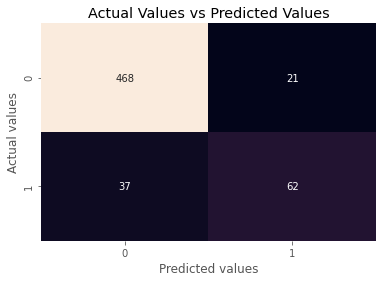

In [ ]:
Cnfsn_mat = create_cnf_mat(y_test, predictions_DT)
sns.heatmap(Cnfsn_mat, annot = True, fmt ='d', cbar = False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual Values vs Predicted Values')
plt.show()

### Precision Recall and Accuracy

In [ ]:
Precision = precision_score(y_test, predictions_DT)
print("Precision of the Decision Tree Model: ",round(Precision,2))

Precision of the Decision Tree Model:  0.75


In [ ]:
Recall = recall_score(y_test, predictions_DT)
print("Recall of the Decision Tree Model: ",round(Recall,2))

Recall of the Decision Tree Model:  0.63


In [ ]:
Accuracy = accuracy_score(y_test, predictions_DT)
print("Accuracy of the Decision Tree Model(Predicted data): ",round(Accuracy,2))

Accuracy of the Decision Tree Model(Predicted data):  0.9


### Area under the curve

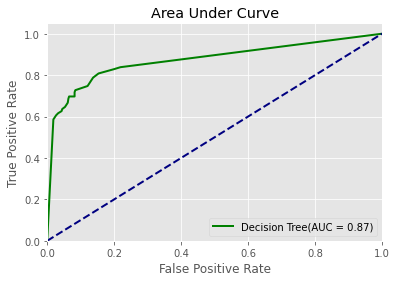

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [ ]:
model_cv_RF = RandomForestClassifier()
# x_train, x_test, y_train, y_test 

In [ ]:
start = time.time()
param_dist = {'bootstrap' : [True],'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'max_features' : ['sqrt','auto','log2'], 'criterion': ['gini']}

cv_RF = GridSearchCV(model_cv_RF,param_grid = param_dist,cv = 10,n_jobs = 3)
cv_RF.fit(x_train,y_train)
print('Best paramaeters in GridSearchCV for Random Forest is: ',cv_RF.best_params_)
end = time.time()

Best paramaeters in GridSearchCV for Random Forest is:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}


In [ ]:
print('Time taken in GridSearchCV is : ',round(end-start,2),'secs')

Time taken in GridSearchCV is :  48.23 secs


In [ ]:
model_RF = RandomForestClassifier(bootstrap =  True, criterion = 'gini', max_depth= 15, max_features = 'sqrt', random_state = 11)
model_RF.fit(x_train, y_train)
model_RF_score_train = model_RF.score(x_train, y_train)
print('Training Score: ',model_RF_score_train)
model_RF_score_test = model_RF.score(x_test, y_test)
print('Testing Score: ',model_RF_score_test)

Training Score:  0.9995748299319728
Testing Score:  0.9591836734693877


In [ ]:
predictions_RF = model_RF.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, predictions_RF))
print(classification_report(y_test, predictions_RF))

[[489   0]
 [ 24  75]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       489
           1       1.00      0.76      0.86        99

    accuracy                           0.96       588
   macro avg       0.98      0.88      0.92       588
weighted avg       0.96      0.96      0.96       588



### Precision Recall and Accuracy

In [ ]:
precision = precision_score(y_test, predictions_RF)
print('The Precision of Random Forest Model is: ',round(precision,2))

The Precision of Random Forest Model is:  1.0


In [ ]:
recall = recall_score(y_test, predictions_RF)
print('The Recall of Random Forest Model is: ',round(recall,2))

The Recall of Random Forest Model is:  0.76


In [ ]:
accuracy = accuracy_score(y_test, predictions_RF)
print('The Accuracy of Random Forest Model is: ',round(accuracy,2))

The Accuracy of Random Forest Model is:  0.96


### OOB Rate

In [ ]:
model_RF.set_params(warm_start = False, oob_score = True)
min_est = 10
max_est = 200
error_rate = {}
for i in range(min_est, max_est+1):
    model_RF.set_params(n_estimators = i)
    model_RF.fit(x_train, y_train)
    oob_error = 1- model_RF.oob_score_
    error_rate[i] = oob_error

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few t

In [ ]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 10 trees to 200 trees)')

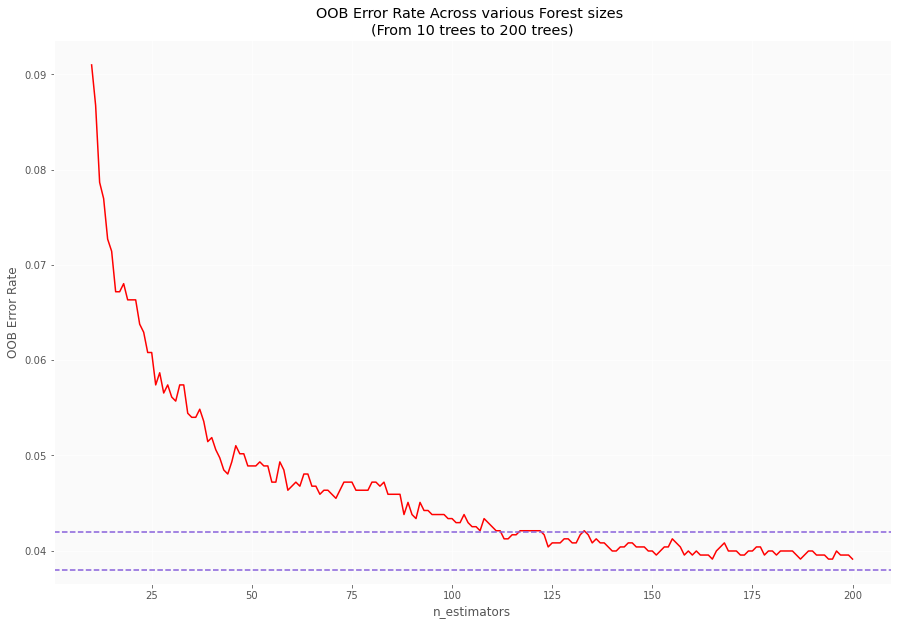

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_facecolor('#fafafa')
oob_series.plot(kind = 'line', color = 'red')
plt.axhline(0.042, color='#875FDB',linestyle='--')
plt.axhline(0.038, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 trees to 200 trees)')

In [ ]:
print('OOB rate for 125 Trees is {0:.5f}'.format(oob_series[90]))

OOB rate for 125 Trees is 0.04379


### Creating Confusion Matrix for Random Forest Model

In [ ]:
def create_cnf_mat(y_test,predictions_RF):
    if (len(y_test.shape)!= (predictions_RF.shape) == 1):
        print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif (y_test.shape)!= (predictions_RF.shape):
        print("Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances")
    else:
        test_crosstab_comp = pd.crosstab(index = y_test, columns = predictions_RF)
        test_crosstab = test_crosstab_comp.values
        return(test_crosstab)

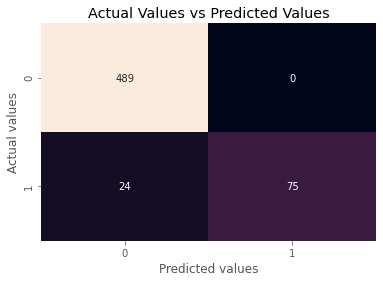

In [ ]:
Cnfsn_mat = create_cnf_mat(y_test, predictions_RF)
sns.heatmap(Cnfsn_mat, annot = True, fmt ='d', cbar = False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual Values vs Predicted Values')
plt.show()

### Area Under Curve

In [ ]:
n_pred_RF = model_DT.predict_proba(x_test)[:,1]

In [ ]:
fpr_RF, tpr_RF,thresholds_RF = roc_curve(y_test, n_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

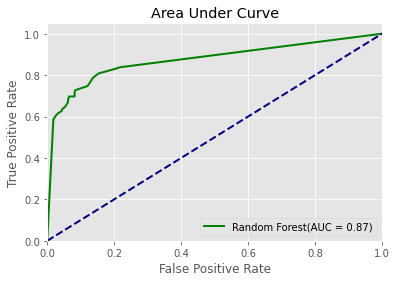

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_RF, tpr_RF, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# K Nearest Neighbour

### Pre Processing and Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
A_train = scaler.transform(x_train)  
A_test = scaler.transform(x_test)
B_test = y_test
B_train = y_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_KNN = []
for i in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(A_train,B_train)
    pred_i_KNN = KNN.predict(A_test)
    error_KNN.append(np.mean(pred_i_KNN !=  B_test))

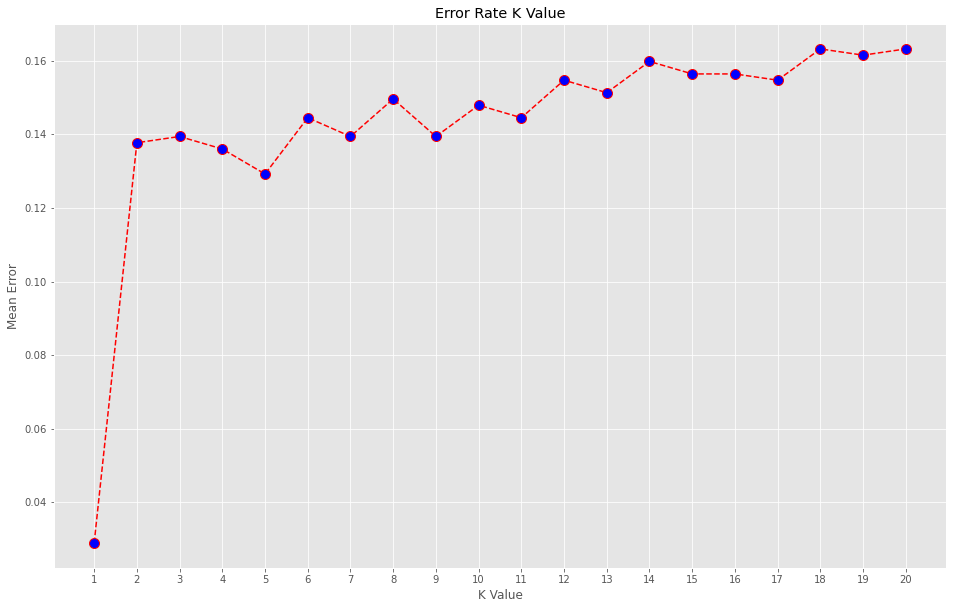

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(range(1,21),error_KNN, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value') 
m =list(range(1,21))
plt.xticks(m)
plt.ylabel('Mean Error')
plt.show()

In [ ]:
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5)
KNN_Classifier.fit(A_train,B_train)
accuracy_KNN_Training =  KNN_Classifier.score(A_train,B_train)
accuracy_KNN_Testing =  KNN_Classifier.score(A_test,B_test)
print('Score for KNN Classifier in Training: ',round(accuracy_KNN_Training,2))
print('Score for KNN Classifier in Testing: ',round(accuracy_KNN_Testing,2))

Score for KNN Classifier in Training:  0.9
Score for KNN Classifier in Testing:  0.87


In [ ]:
Predictions_KNN = KNN_Classifier.predict(A_test)

### Confusion Matrix 

In [ ]:
print(confusion_matrix(B_test,Predictions_KNN))
print(classification_report(B_test,Predictions_KNN))

[[486   3]
 [ 73  26]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       489
           1       0.90      0.26      0.41        99

    accuracy                           0.87       588
   macro avg       0.88      0.63      0.67       588
weighted avg       0.87      0.87      0.84       588



### Accuracy Precision Recall

In [ ]:
accuracy = accuracy_score(B_test,Predictions_KNN)
print('The accuracy of the K Nearest Neighbor Algorithm (Predictions) is: ',round(accuracy,2))

The accuracy of the K Nearest Neighbor Algorithm (Predictions) is:  0.87


In [ ]:
precision = precision_score(B_test,Predictions_KNN)
print('The precision of the K Nearest Neighbor Algorithm is: ',round(precision,2))

The precision of the K Nearest Neighbor Algorithm is:  0.9


In [ ]:
recall = recall_score(B_test,Predictions_KNN)
print('The recall of the K Nearest Neighbor Algorithm is: ',round(recall,2))

The recall of the K Nearest Neighbor Algorithm is:  0.26


### Confusion Matrix

In [ ]:
def create_cnf_mat(B_test,Predictions_KNN):
    if (len(B_test.shape)!= (Predictions_KNN.shape) == 1):
        print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif (B_test.shape)!= (Predictions_KNN.shape):
        print("Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances")
    else:
        test_crosstab_comp = pd.crosstab(index = B_test, columns = Predictions_KNN)
        test_crosstab = test_crosstab_comp.values
        return(test_crosstab)

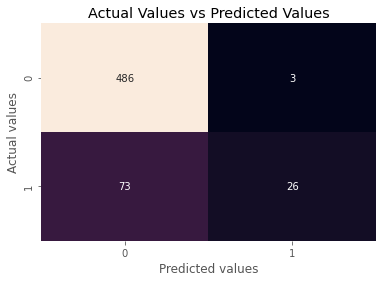

In [ ]:
Cnfsn_mat = create_cnf_mat(B_test,Predictions_KNN)
sns.heatmap(Cnfsn_mat, annot = True, fmt ='d', cbar = False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual Values vs Predicted Values')
plt.show()

### Area under Curve

In [ ]:
fpr_KNN, tpr_KNN,thresholds_RF = roc_curve(B_test,Predictions_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)

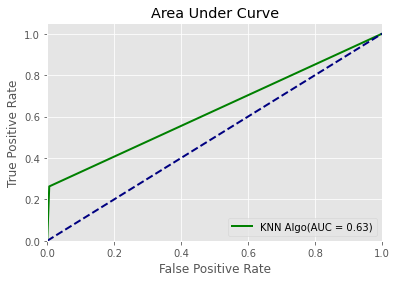

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_KNN, tpr_KNN, color='green',lw=lw, label='KNN Algo(AUC = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Reg_Log = LogisticRegression()
Reg_Log.fit(A_train,B_train)
accuracy_Reg_Log_Training =  Reg_Log.score(A_train,B_train)
accuracy_Reg_Log_Testing =  Reg_Log.score(A_test,B_test)
print('Score for KNN Classifier in Training: ',round(accuracy_Reg_Log_Training,2))
print('Score for KNN Classifier in Testing: ',round(accuracy_Reg_Log_Testing,2))

Score for KNN Classifier in Training:  0.88
Score for KNN Classifier in Testing:  0.87


In [ ]:
Predictions_LG = Reg_Log.predict(A_test)
print(confusion_matrix(B_test,Predictions_LG))
print(classification_report(B_test,Predictions_LG))

[[481   8]
 [ 70  29]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       489
           1       0.78      0.29      0.43        99

    accuracy                           0.87       588
   macro avg       0.83      0.64      0.68       588
weighted avg       0.86      0.87      0.84       588



### Precision Accuracy and Recall

In [ ]:
accuracy = accuracy_score(B_test,Predictions_LG)
print('The accuracy of the K Nearest Neighbor Algorithm (Predictions) is: ',round(accuracy,2))

The accuracy of the K Nearest Neighbor Algorithm (Predictions) is:  0.87


In [ ]:
precision = precision_score(B_test,Predictions_LG)
print('The precision of the K Nearest Neighbor is: ',round(precision,2))

The precision of the K Nearest Neighbor is:  0.78


In [ ]:
recall = recall_score(B_test,Predictions_LG)
print('The recall of the K Nearest Neighbor is: ',round(recall,2))

The recall of the K Nearest Neighbor is:  0.29


### Confusion Matrix

In [ ]:
def create_cnf_mat(d_test,Predictions_LG):
    if (len(B_test.shape)!= (Predictions_LG.shape) == 1):
        print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif (B_test.shape)!= (Predictions_LG.shape):
        print("Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances")
    else:
        test_crosstab_comp = pd.crosstab(index = d_test, columns = Predictions_LG)
        test_crosstab = test_crosstab_comp.values
        return(test_crosstab)

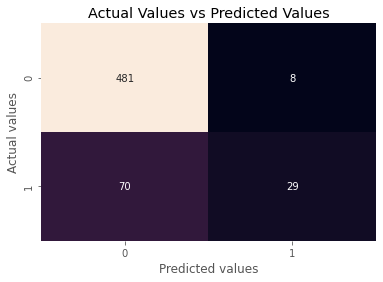

In [ ]:
Cnfsn_mat = create_cnf_mat(B_test,Predictions_LG)
sns.heatmap(Cnfsn_mat, annot = True, fmt ='d', cbar = False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual Values vs Predicted Values')
plt.show()

### Area under Curve

In [ ]:
fpr_LG, tpr_LG,thresholds_LG = roc_curve(B_test,Predictions_LG)
roc_auc_LG = auc(fpr_LG, tpr_LG)

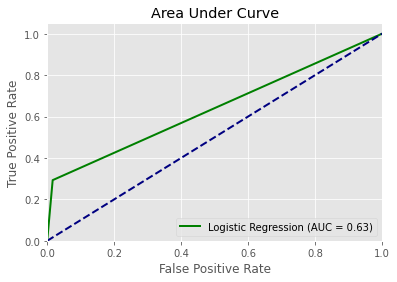

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_LG, tpr_LG, color='green',lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# SVM Algorithm

In [ ]:
from sklearn.svm import SVC   # Importing Support Vetor Classifier
from sklearn import metrics
svc = SVC()
svc.fit(A_train,B_train)
accuracy_svc_Training =  svc.score(A_train,B_train)
accuracy_svc_Testing =  svc.score(A_test,B_test)
print('Score for SVM Classifier in Training: ',round(accuracy_svc_Training,2))
print('Score for SVM Classifier in Testing: ',round(accuracy_svc_Testing,2))

Score for SVM Classifier in Training:  0.95
Score for SVM Classifier in Testing:  0.9


In [ ]:
predictions_SVC = svc.predict(A_test)
accuracy = accuracy_score(B_test,predictions_SVC)
print('The accuracy (predictions) of Support Vector Machine is: ',accuracy)

The accuracy (predictions) of Support Vector Machine is:  0.9047619047619048


## Linear Kernel, RBF Kernel, Polynomial Kernel for SVM

In [ ]:
svc = SVC(kernel='linear')
svc.fit(A_train,B_train)
predictions_SVC = svc.predict(A_test)
accuracy = accuracy_score(B_test,predictions_SVC)
print('The accuracy (predictions) of Support Vector Machine is: ',accuracy)

The accuracy (predictions) of Support Vector Machine is:  0.8316326530612245


In [ ]:
svc = SVC(kernel='rbf')
svc.fit(A_train,B_train)
predictions_SVC = svc.predict(A_test)
accuracy = accuracy_score(B_test,predictions_SVC)
print('The accuracy (predictions) of Support Vector Machine is: ',accuracy)

The accuracy (predictions) of Support Vector Machine is:  0.9047619047619048


In [ ]:
svc = SVC(kernel='poly')
svc.fit(A_train,B_train)
predictions_SVC = svc.predict(A_test)
accuracy = accuracy_score(B_test,predictions_SVC)
print('The accuracy (predictions) of Support Vector Machine is: ',accuracy)

The accuracy (predictions) of Support Vector Machine is:  0.9183673469387755


### Using GridSearchCV for SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
tuned_parameters = {'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,4,0.2)) , 'kernel':['poly','linear','rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_GridSearch = GridSearchCV(svm, tuned_parameters, cv =10, scoring = 'accuracy')


In [ ]:
svm_GridSearch.fit(A_train,B_train)
print(svm_GridSearch.best_score_)

0.9502596465921384


In [ ]:
print(svm_GridSearch.best_params_)

{'C': 3.900000000000001, 'gamma': 0.05, 'kernel': 'rbf'}


In [ ]:
svc = SVC(C = 3.9, gamma = 0.05, kernel = 'rbf')
svc.fit(A_train,B_train)
accuracy_svc_Training =  svc.score(A_train,B_train)
accuracy_svc_Testing =  svc.score(A_test,B_test)
print('Score for SVM Classifier in Training: ',round(accuracy_svc_Training,2))
print('Score for SVM Classifier in Testing: ',round(accuracy_svc_Testing,2))

Score for SVM Classifier in Training:  1.0
Score for SVM Classifier in Testing:  0.97


In [ ]:
Predictions_SVM = svc.predict(A_test)

### Confusion Matrix

In [ ]:
def create_cnf_mat(F_test,Predictions_SVM):
    if (len(B_test.shape)!= (Predictions_SVM.shape) == 1):
        print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets')
    elif (B_test.shape)!= (Predictions_SVM.shape):
        print("Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances")
    else:
        test_crosstab_comp = pd.crosstab(index = F_test, columns = Predictions_SVM)
        test_crosstab = test_crosstab_comp.values
        return(test_crosstab)

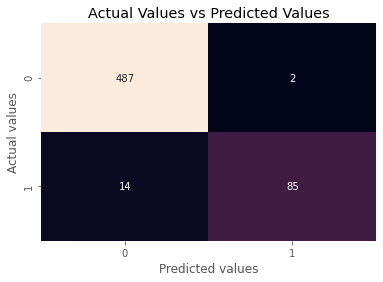

In [ ]:
Cnfsn_mat = create_cnf_mat(B_test,Predictions_SVM)
sns.heatmap(Cnfsn_mat, annot = True, fmt ='d', cbar = False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Actual Values vs Predicted Values')
plt.show()

### Accuracy Precision and Recall

In [ ]:
accuracy_SVM = accuracy_score(B_test,Predictions_SVM)
print('Accuracy(Predictions) for SVM Model is: ',accuracy_SVM)

Accuracy(Predictions) for SVM Model is:  0.9727891156462585


In [ ]:
precision_SVM = precision_score(B_test,Predictions_SVM)
print('Precision for SVM Model is: ',precision_SVM)

Precision for SVM Model is:  0.9770114942528736


In [ ]:
recall_SVM = recall_score(B_test,Predictions_SVM)
print('Recall for SVM Model is: ',recall_SVM)

Recall for SVM Model is:  0.8585858585858586


### Area under Curve

In [ ]:
fpr_SVM, tpr_SVM,thresholds_SVM = roc_curve(B_test,Predictions_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)

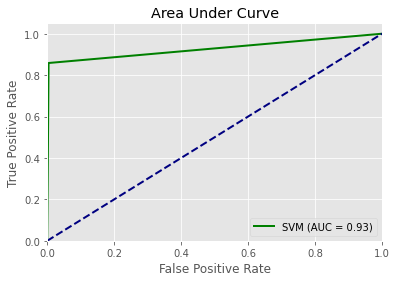

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_SVM, tpr_SVM, color='green',lw=lw, label='SVM (AUC = %0.2f)' % roc_auc_SVM)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion and Draw Back points

### Intro:

In [ ]:
# Initally I have worked on certain parameters to understand the nature of data by using the columns atttribute, info function, dtypes atribute ,
# i.e presence of numerical and categrical columns and classified the data under numeriacal and categoricallist,  later i proceeded with various
# Data cleaning methods such as null check, duplicate rows checketc. to make the data useful for drawing insights and also to build a model



### Insights

In [ ]:
# Around 16% of the total employees are undergoing Attrition which seems to be a relaistic view of the corporate industry.

# Useful Insights to understand and delay/ prevent attrition:

# 1.> The job satisfication and environmental satification for around 110 - 1200 (around 30%) employees is poor i.e in Rating scale I and II which 
# contributes to a proportion of attrition. The HR departemnt may conduct meetings with amangers and individuals to understand the reasons behind 
# job unsatisfication, and HR should come up with ideas like job transitions, addditional training courses etc. to build a good level of job satisfication
# and similarly planning fun activities, suprise team parties etc to increase the environmental satisfication

# 2.> The percentage salary hike of around 50% employees is around 10 to 14% , which may not be prevelant as per the industry standards. HR 
# department should focus on matching the industry prevalent standards.

# 3->  The Training times for certain employees i.e around 150 employees is 0 that means no training sessions have been conducted. The HR
# department should focus on training their employees else the fatigueness over work will keeping on reaching heights and eventually the employees 
# will be finding ways for new companies.

# 4->  The promotion for for around 200 employees who have worked for more than 4 years is due. The HR department should be very particular in
# promoting people and getting them leadership roles if promotiion is not given due to lack of necessary skills. HR department should come up with
# many training programmes to build good set of skills in the individuals else the highly experienced people will keep on contribution to Attrition.

# 5->  The Sales Executive, Research Directors, Healthcare reps and Manufacturing Directors are  hugely contributing to attrition. The HR should consider
# a good pay hike for Research Directors as the people with experience in this field are getting highl paid. The sales executive and Helathcare reps is a 
# very volatile post, HR should focus on introducing certain gift schemes/freebies for sales execcutive and healthcare reps if they reach a particular target. This will attract the sales force easily.


# 6->  The average working hours of Reseach Directors is more and their attrition rate too. Hence HR  department should do a necessary hiring to 
# normalize the pressure else stopping attrition for them  will be difficult and moreover the salary hike for research directors is only 12% which boosts
# attriition. Hence salary hike should also be considered for them by the HR Department.

# Similarly the working hours is on average basis for manufacurinng Direcor and Healthcare Reps as compared to the other divisions but there is high 
# attrition in these divisions. The high attrition is deut to less perecntage of salary hike i.e around 15% only and may be  due to available opportunities
# and allowances into the industry. Hence, HR should focus on increasing the pay/ hike percen and also attract them with target specific rewards to boost 
# their morale.

# 7->  The plot gives the insights that people with less than 2 years od work ex in Research scinetist, lab technician, sales rep  are opting for attrition
# which is probably due to good no of opportinities in industries along with work life balance and other variables.  HR department should discover certain
# schemes to keep the young people attracted as they are the huge contributors to the company. The HR department should come up by giving quarterly 
# bonus, work from home , extra time allowance, night shift allowances etc, to keep the young force motivated

# Research director with greater than 10 years since last promotion are opting for Attrition that may further clow down the company as they are the people
# who help in decision making and  hugely contributing to growth of company. The HR department should stright away try to ensure good hike, good work 
# life balance by allocating comulsory paid leaves, job satisficaiton by involing them in trending  projects, making them share holder in tthe organisation, 
# paying good bonus etc, to keep them motivated





### Selection of Model:

In [ ]:
# The five classifier methods have been tried i.e Decision Tree, Random Forest, K Nearest Neighbor,
# Logistic Regression, Support Vector CLassifier. The Random forest model has performed the best
# by giving acceptable results in terms of TEsting and Traing score, Accuracy, Precision, Recall and
# Area under curve as compared to the other models. The Random Forest model was implemented by
# using Grid Search CV as it helps in Hyper parameters optimization. The Random Forest being a robust
# model and also giving apreciable results will help us to predict the future HR attrition and hence the model
# will throw the ueful insights that will help to take necessary precautions to prevent attrition